# What Makes the Highest Paid NBA Players?
**Analyzing player attributes and salary from NBA 2016-2017 season dataset.**

Author: Mitchell Lui

## Introduction

NBA players are some of the highest paid athletes in all of sports. This project explores which strengths result in players getting a higher salary.  


Using detailed player data from the 2016-2017 NBA season, we will examine top player and salary breakdown by team. We will then take a deeper look at player salary by examing player attributes and their relationship to salary. Hopefully this will bring some insight into which attributes lead to the most successful (highest paid) NBA players and also more background knowledge on the NBA as well.


****

## Required Libraries

- Pandas: used for data display and partitioning
- Matplotlib - pyplot: used for plotting Pandas data into graphs and charts
- Seaborn: provides a high-level interface for graphics on top of Matplotlib
- scikit-learn: very popular machine learning library
  - linear-model: used to calculate models for multiple linear regression
- statsmodels - api: used to calculate models and statistics with multple linear regression

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from statsmodels import api as sm

## Dataset Source

The dataset used is the ranking for the "top" 100 players present in the NBA.  It contains detailed percentages for all aspects of a players performance. There is also qualitative data such as player name and their team. 

- Dataset [here](https://www.kaggle.com/noahgift/social-power-nba#nba_2016_2017_100.csv).
- Offensive and defensive rating calculations [here](https://www.basketball-reference.com/about/ratings.html).
- General basketball stats terminology [here](https://stats.nba.com/help/glossary/).


## 1. Data Colleciton

Load .csv file and display the first 5 rows to get a sense of what's in the dataset.

In [2]:
pd.set_option('display.max_columns', None) # see all columns in the dataframe
original = pd.read_csv("nba_2016_2017_100.csv")
pd.set_option('display.max_rows', 500)
original.head()

,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,OFF_RATING,DEF_RATING,NET_RATING,AST_PCT,AST_TO,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,PACE,PIE,FGM,FGA,FGM_PG,FGA_PG,FG_PCT,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,OFF_RATING_RANK,DEF_RATING_RANK,NET_RATING_RANK,AST_PCT_RANK,AST_TO_RANK,AST_RATIO_RANK,OREB_PCT_RANK,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,USG_PCT_RANK,PACE_RANK,PIE_RANK,FGM_RANK,FGA_RANK,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK,CFID,CFPARAMS,WIKIPEDIA_HANDLE,TWITTER_HANDLE,SALARY_MILLIONS,PTS,ACTIVE_TWITTER_LAST_YEAR,TWITTER_FOLLOWER_COUNT_MILLIONS
0,201566,Russell Westbrook,1610612760,OKC,28,81,46,35,0.568,34.6,107.9,104.6,3.3,0.543,1.92,23.4,0.053,0.279,0.167,12.2,0.476,0.554,0.408,102.31,0.230,824,1941,10.2,24.0,0.425,18,62,330,143,22,115,168,95,1,140,96,171,22,53,358,339,181,2,47,1,1,1,2,1,293,5,"2,015,661,610,612,760",Russell_Westbrook,russwest44,26.54,31.6,1,4.500
1,1626246,Boban Marjanovic,1610612765,DET,28,35,16,19,0.457,8.4,104.3,102.4,1.9,0.054,0.90,5.1,0.166,0.313,0.239,5.7,0.545,0.606,0.248,97.20,0.196,72,132,2.1,3.8,0.545,365,345,149,270,432,260,82,139,412,381,467,4,8,5,30,100,52,63,328,2,344,360,306,356,47,5,"16,262,461,610,612,700",Boban_Marjanovi_,0,7.00,5.5,0,0.000
2,1627743,Demetrius Jackson,1610612738,BOS,22,5,1,4,0.200,3.4,124.2,117.8,6.3,0.300,0.00,31.1,0.091,0.118,0.103,0.0,0.875,0.753,0.172,87.46,0.194,3,4,0.6,0.8,0.750,458,464,34,468,475,2,475,53,32,466,28,81,317,201,1,2,4,279,483,3,461,476,458,480,3,5,"16,277,431,610,612,700",Demetrius_Jackson,d_jay11,1.45,2.0,1,0.049
3,203076,Anthony Davis,1610612740,NOP,24,75,31,44,0.413,36.1,104.2,102.5,1.7,0.110,0.87,7.3,0.067,0.269,0.170,8.4,0.518,0.580,0.326,100.19,0.192,770,1526,10.3,20.3,0.505,111,196,419,316,9,271,88,144,230,387,442,139,27,48,129,189,112,9,121,4,3,5,1,3,95,5,"2,030,761,610,612,740",Anthony_Davis_(basketball),antdavis23,22.12,28.0,1,1.220
4,201935,James Harden,1610612745,HOU,27,81,54,27,0.667,36.4,113.6,107.3,6.3,0.505,1.95,27.6,0.035,0.212,0.123,14.1,0.525,0.613,0.341,102.98,0.190,674,1533,8.3,18.9,0.440,18,15,221,56,7,27,296,55,2,132,48,242,73,144,426,167,40,7,34,5,10,4,15,9,253,5,"2,019,351,610,612,740",James_Harden,jharden13,26.50,29.1,1,4.470


## Dropping Outliers

If you are a basketball fan like myself, you will probably be wondering why Demetrius Jackson (index 2) is in the top 100 players. On closer inspection, his OFF_RATING (offensive rating) is abnormally high. This is probably due to the fact that he made a percentage of the few shots he even took. To eliminate outliers like him, we will drop all players who play less than an average of 15 minutes per game. Typically better players will play at least half of the 48 minute game.

In [3]:
original.drop(original[original.MIN < 15].index, inplace=True) # dropping players who average less than 15 mins/game
original.reset_index(inplace=True) # reset index

original.head()

,index,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_ABBREVIATION,AGE,GP,W,L,W_PCT,MIN,OFF_RATING,DEF_RATING,NET_RATING,AST_PCT,AST_TO,AST_RATIO,OREB_PCT,DREB_PCT,REB_PCT,TM_TOV_PCT,EFG_PCT,TS_PCT,USG_PCT,PACE,PIE,FGM,FGA,FGM_PG,FGA_PG,FG_PCT,GP_RANK,W_RANK,L_RANK,W_PCT_RANK,MIN_RANK,OFF_RATING_RANK,DEF_RATING_RANK,NET_RATING_RANK,AST_PCT_RANK,AST_TO_RANK,AST_RATIO_RANK,OREB_PCT_RANK,DREB_PCT_RANK,REB_PCT_RANK,TM_TOV_PCT_RANK,EFG_PCT_RANK,TS_PCT_RANK,USG_PCT_RANK,PACE_RANK,PIE_RANK,FGM_RANK,FGA_RANK,FGM_PG_RANK,FGA_PG_RANK,FG_PCT_RANK,CFID,CFPARAMS,WIKIPEDIA_HANDLE,TWITTER_HANDLE,SALARY_MILLIONS,PTS,ACTIVE_TWITTER_LAST_YEAR,TWITTER_FOLLOWER_COUNT_MILLIONS
0,0,201566,Russell Westbrook,1610612760,OKC,28,81,46,35,0.568,34.6,107.9,104.6,3.3,0.543,1.92,23.4,0.053,0.279,0.167,12.2,0.476,0.554,0.408,102.31,0.230,824,1941,10.2,24.0,0.425,18,62,330,143,22,115,168,95,1,140,96,171,22,53,358,339,181,2,47,1,1,1,2,1,293,5,"2,015,661,610,612,760",Russell_Westbrook,russwest44,26.54,31.6,1,4.50
1,3,203076,Anthony Davis,1610612740,NOP,24,75,31,44,0.413,36.1,104.2,102.5,1.7,0.110,0.87,7.3,0.067,0.269,0.170,8.4,0.518,0.580,0.326,100.19,0.192,770,1526,10.3,20.3,0.505,111,196,419,316,9,271,88,144,230,387,442,139,27,48,129,189,112,9,121,4,3,5,1,3,95,5,"2,030,761,610,612,740",Anthony_Davis_(basketball),antdavis23,22.12,28.0,1,1.22
2,4,201935,James Harden,1610612745,HOU,27,81,54,27,0.667,36.4,113.6,107.3,6.3,0.505,1.95,27.6,0.035,0.212,0.123,14.1,0.525,0.613,0.341,102.98,0.190,674,1533,8.3,18.9,0.440,18,15,221,56,7,27,296,55,2,132,48,242,73,144,426,167,40,7,34,5,10,4,15,9,253,5,"2,019,351,610,612,740",James_Harden,jharden13,26.50,29.1,1,4.47
3,5,201142,Kevin Durant,1610612744,GSW,28,62,51,11,0.823,33.4,117.2,101.3,16.0,0.218,2.17,18.4,0.023,0.232,0.137,8.5,0.594,0.651,0.276,103.71,0.186,551,1026,8.9,16.5,0.537,244,21,79,14,40,9,57,9,79,89,168,320,55,106,131,31,12,31,17,6,26,35,9,22,53,5,"2,011,421,610,612,740",Kevin_Durant,KDTrey5,26.54,25.1,1,16.20
4,6,2544,LeBron James,1610612739,CLE,32,74,51,23,0.689,37.8,114.9,107.1,7.7,0.388,2.13,25.6,0.040,0.209,0.127,12.0,0.594,0.619,0.297,98.38,0.183,736,1344,9.9,18.2,0.548,126,21,190,45,1,18,287,45,7,98,68,220,81,125,347,32,35,15,230,7,4,19,3,15,45,5,"25,441,610,612,739",LeBron_James,KingJames,30.96,26.4,1,37.00


Get a list of all the columns in the table. We will obviously not be using all of them. Refer to stats link to see what the terms mean if you are unsure.

In [4]:
original.columns

Index(['index', 'PLAYER_ID', 'PLAYER_NAME', 'TEAM_ID', 'TEAM_ABBREVIATION',
       'AGE', 'GP', 'W', 'L', 'W_PCT', 'MIN', 'OFF_RATING', 'DEF_RATING',
       'NET_RATING', 'AST_PCT', 'AST_TO', 'AST_RATIO', 'OREB_PCT', 'DREB_PCT',
       'REB_PCT', 'TM_TOV_PCT', 'EFG_PCT', 'TS_PCT', 'USG_PCT', 'PACE', 'PIE',
       'FGM', 'FGA', 'FGM_PG', 'FGA_PG', 'FG_PCT', 'GP_RANK', 'W_RANK',
       'L_RANK', 'W_PCT_RANK', 'MIN_RANK', 'OFF_RATING_RANK',
       'DEF_RATING_RANK', 'NET_RATING_RANK', 'AST_PCT_RANK', 'AST_TO_RANK',
       'AST_RATIO_RANK', 'OREB_PCT_RANK', 'DREB_PCT_RANK', 'REB_PCT_RANK',
       'TM_TOV_PCT_RANK', 'EFG_PCT_RANK', 'TS_PCT_RANK', 'USG_PCT_RANK',
       'PACE_RANK', 'PIE_RANK', 'FGM_RANK', 'FGA_RANK', 'FGM_PG_RANK',
       'FGA_PG_RANK', 'FG_PCT_RANK', 'CFID', 'CFPARAMS', 'WIKIPEDIA_HANDLE',
       'TWITTER_HANDLE', 'SALARY_MILLIONS', 'PTS', 'ACTIVE_TWITTER_LAST_YEAR',
       'TWITTER_FOLLOWER_COUNT_MILLIONS'],
      dtype='object')

## Explatory Data Analysis and Data Visualization

## Highest Scoring Players in the League

For now we will grab several columns from the original dataset that will be of importance. We will rename pts to PPG and team abbreaviation to team in the dataset to make it more clear what it represents and also sort it by highest PPG to see which players average the highest number of points per game.

In [5]:
data = original[['PLAYER_NAME', 'TEAM_ABBREVIATION', 'AGE', 'OFF_RATING', 'DEF_RATING', 'SALARY_MILLIONS', 'PTS']].copy()
#renaming pts to points per game (ppg)
original.rename(columns={"PTS":"PPG"}, inplace=True) # renaming pts to PPG
data.rename(columns={"PTS":"PPG"}, inplace=True)
#renaming team abbreaviation to team
data.rename(columns={"TEAM_ABBREVIATION":"TEAM"}, inplace=True) # renaming team abbreaviaiton to team
data.rename
highest_pts = data.sort_values(by = ['PPG'], ascending = [False])
highest_pts.reset_index(inplace=True)
highest_pts.head()


,index,PLAYER_NAME,TEAM,AGE,OFF_RATING,DEF_RATING,SALARY_MILLIONS,PPG
0,0,Russell Westbrook,OKC,28,107.9,104.6,26.54,31.6
1,2,James Harden,HOU,27,113.6,107.3,26.50,29.1
2,15,Isaiah Thomas,BOS,28,113.6,108.6,6.58,28.9
3,1,Anthony Davis,NOP,24,104.2,102.5,22.12,28.0
4,19,DeMar DeRozan,TOR,27,110.2,107.0,26.54,27.3


## Summary of Highest Scoring Players

Display some basic statistics about the dataset. Since summary statistics are used in the pandas describe() method, only the columns with quantitative data are displayed.  Use the 'count' row to get a sense of how complete each column is. There are 85 players in the dataset in total,  and looking at the count row, we know that none of the players are missing values for any of the attributes, so there is no need to drop any of the players from analysis. 

In [6]:
highest_pts.describe()

,index,AGE,OFF_RATING,DEF_RATING,SALARY_MILLIONS,PPG
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,42.000000,27.517647,107.887059,105.896471,12.897553,16.972000
std,24.681302,3.659989,4.246926,3.101246,8.516232,6.359561
min,0.000000,21.000000,97.500000,97.500000,0.310000,5.100000
25%,21.000000,25.000000,104.700000,104.000000,4.380000,12.400000
50%,42.000000,27.000000,107.400000,106.000000,12.800000,16.700000
75%,63.000000,29.000000,110.200000,107.900000,20.570000,22.400000
max,84.000000,39.000000,118.100000,113.300000,30.960000,31.600000


## Teams with Top Players

Here we display a list of all the teams the top players belong to. There are 30 teams listed and 30 teams in the NBA so every team has at least one "top" player.

In [7]:
highest_pts['TEAM'].unique()

array(['OKC', 'HOU', 'BOS', 'NOP', 'TOR', 'POR', 'CLE', 'SAS', 'GSW',
       'MIN', 'CHI', 'IND', 'CHA', 'WAS', 'MIL', 'NYK', 'UTA', 'LAC',
       'PHX', 'MEM', 'BKN', 'MIA', 'PHI', 'DAL', 'SAC', 'DEN', 'ATL',
       'DET', 'ORL', 'LAL'], dtype=object)

## Number of Top Players By Team

Strongest_team is a dataframe that has the count of the number of top players by team. According to the chart, the San Antonio Spurs (SAS) lead the league in the most number of "top" players with 5 of their players being represented.

In [8]:
strongest_team = highest_pts.groupby(highest_pts['TEAM']).count().reset_index()
strongest_team = strongest_team[['TEAM','PPG']]
strongest_team = strongest_team.sort_values('PPG', ascending=False)
strongest_team.columns = ['TEAM','COUNT']
strongest_team.head()

,TEAM,COUNT
26,SAS,5
14,MEM,4
6,DAL,4
16,MIL,4
12,LAC,4


Let's plot the number of top players by team. From the bar chart, the distribution of top players seems relatively normal with the bulk of the teams having 3 top players.

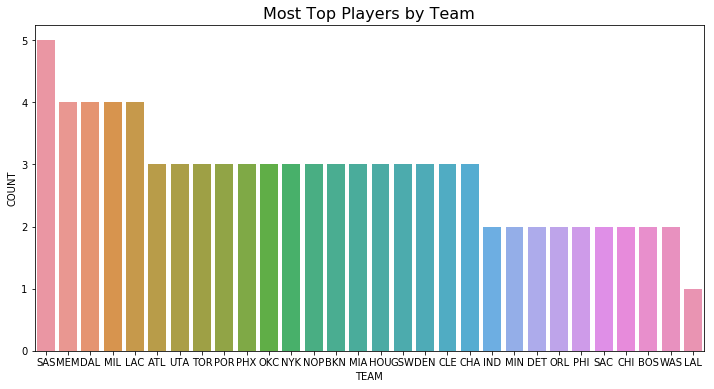

In [9]:
plt.figure(figsize=(12,6))
plt.title("Most Top Players by Team", fontsize=16)
sns.barplot(data=strongest_team, x='TEAM', y='COUNT')
plt.show()

From the bar chart, the distribution of top players seems relatively normal with the bulk of the teams having 3 top players.

## Highest Payroll By Team

We just explored the number of top players by team. We would expect in general teams with more top players would more likely have a higher total higher payroll (total amount paid to players on team) because better players command higher salaries. Let's see the highest payroll by team to test this theory. 

In [10]:
data = highest_pts.groupby(['TEAM'], as_index=False)['SALARY_MILLIONS'].sum()
data = data.sort_values('SALARY_MILLIONS', ascending=False)
data.head()

,TEAM,SALARY_MILLIONS
5,CLE,69.770
12,LAC,65.080
14,MEM,62.290
9,GSW,53.980
26,SAS,50.612


We can see that theory pretty much holds true. The San Antonio Spurs (SAS), Memphis Grizzlies (MEM), and Los Angeles Clippers (LAC) were among the top 5 teams with the most number of top players and also were in the top 5 for highest payrolls. The Cleveland Cavaliers (CLE) has LeBron James, the best player in the world, and the Golden State Warriors (GSW) have multiple all star players, so it is not surprising that they are in the top 5 for highest payrolls.

 ## Plotting Team Payroll
 
 Let's plot team payroll to get picture pictorially on how payroll varies from team to team.

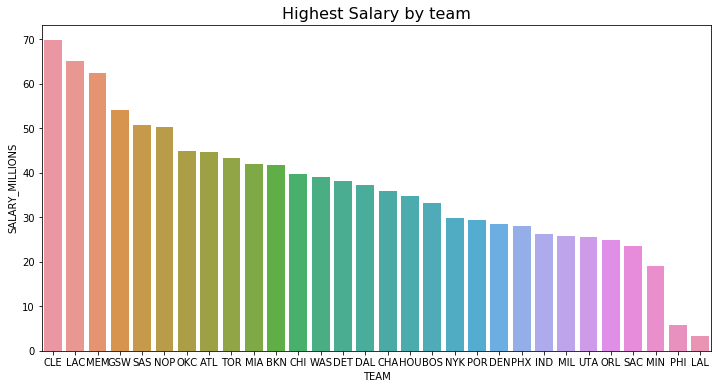

In [11]:
plt.figure(figsize=(12,6))
plt.title("Highest Salary by team", fontsize=16)
sns.barplot(data=data, x='TEAM', y='SALARY_MILLIONS')
plt.show()

 ## Putting Highest Payroll and Number of Highest Players Together
 
 result is a dataframe that merges the strongest team dataframe and the highest payroll dataframe together

In [12]:
result = pd.merge(data, strongest_team, on = 'TEAM')
result.head()

,TEAM,SALARY_MILLIONS,COUNT
0,CLE,69.770,3
1,LAC,65.080,4
2,MEM,62.290,4
3,GSW,53.980,3
4,SAS,50.612,5


This table just makes clear what was stated before about the top 5 teams with the most number of top players having the highest payrolls as well

In [13]:
result.describe()

,SALARY_MILLIONS,COUNT
count,30.000000,30.000000
mean,36.543067,2.833333
std,15.285166,0.833908
min,3.280000,1.000000
25%,26.722500,2.000000
50%,36.625000,3.000000
75%,44.212500,3.000000
max,69.770000,5.000000


From the table above, it appears the the Cleveland Cavaliers (CLE) have a payroll that is almost double the league average only factoring in top players in the league. To the Cavaliers, LeBron James is a steal at any price. It turns out that teams have a salary cap which you can read about [here](https://en.wikipedia.org/wiki/NBA_salary_cap). Basically, teams can only players up to a certain amount. To see what I mean about LeBron being a steal, here is a cool article describing his economic impact on Cleveland [here](http://time.com/2981583/lebron-james-cleveland-cavs-money/). 

 ## Comparing Salary vs PPG

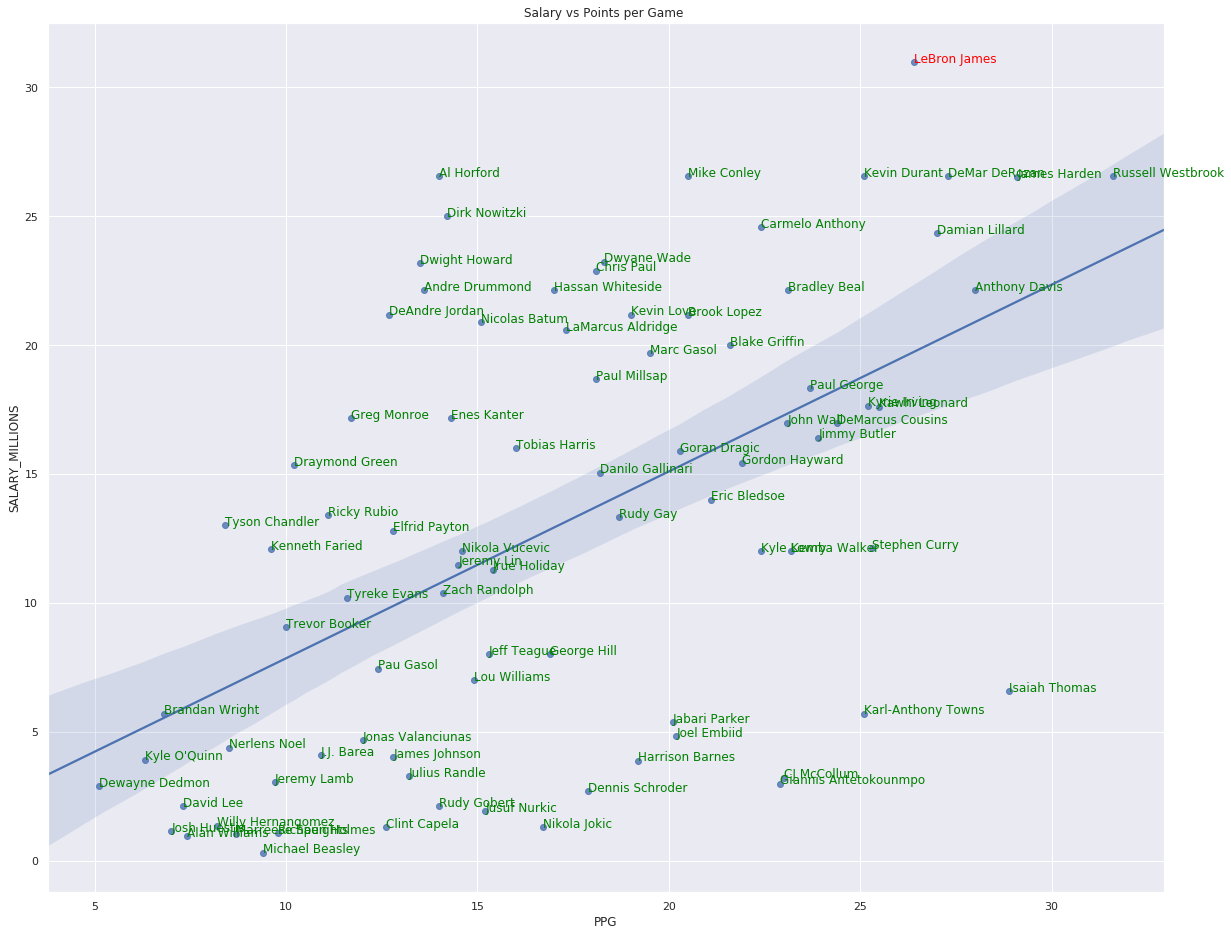

In [14]:
matplotlib.rcParams['figure.figsize'] = [20, 16]
sns.set(color_codes=True)


def regplot(df, x, y, title):

    #Takes in a dataframe, the name of two columns in the dataframe, and a title.
    #Creates a sns regplot with labels based on institution.
    
    fig, ax = plt.subplots()  # exposing the fig and ax here so ax can be used to label
    fig = sns.regplot(df[x], df[y], dropna=True)
    plt.title(title)
    
    for i, txt in enumerate(df['PLAYER_NAME']):
        if "LeBron" in txt: # sanity check to confirm the LeBron is the highest paid
            c = "red"
        else:
            c = "green"
        ax.annotate(txt, (df[x][i],df[y][i]), color=c)
    plt.show()

# plotting student populations vs faculty count
regplot(highest_pts, "PPG", "SALARY_MILLIONS", "Salary vs Points per Game ")

Looking at the above plot there seems to be positive correlation between PPG and salary. It is important to note that most NBA contracts are not 1 year contracts. So a younger player who signed a multi year deal that had a breakout year a year or two into their contract would still not be paid that well even though they are playing at a high level. Some of the players in the bottom right corner like Karl Anthony Towns are new to the league so they have yet to eligible for a contract that accurately represents their worth.

 ## Comparing Salary vs Offensive Rating

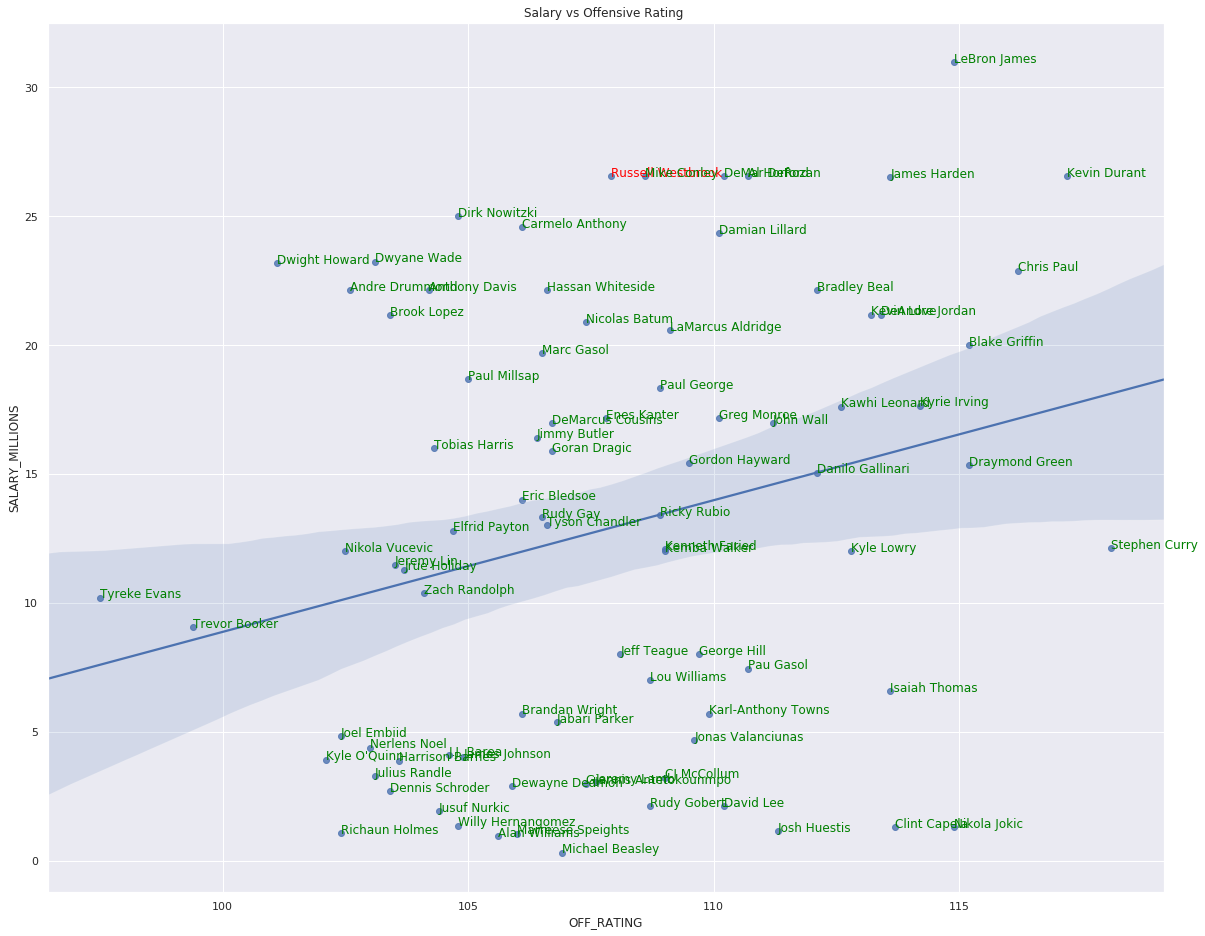

In [15]:
def regplot(df, x, y, title):
    
    fig, ax = plt.subplots()  
    fig = sns.regplot(df[x], df[y], dropna=True)
    plt.title(title)
    
    for i, txt in enumerate(df['PLAYER_NAME']):
        if "Westbrook" in txt: 
            c = "red"
        else:
            c = "green"
        ax.annotate(txt, (df[x][i],df[y][i]), color=c)
    plt.show()


regplot(highest_pts, "OFF_RATING", "SALARY_MILLIONS", "Salary vs Offensive Rating ")

In this plot I decided to highlight Russell Westbrook. In the Salary vs PPG plot, we could see he averaged the most points per game(look on far right of the plot). However, as shown in this plot, more PPG doesn't necessarily mean a higher offensive rating. This plot has less of a positive corelation than salary vs ppg.

 ## Comparing Salary vs Defensive Rating

In [16]:
def regplot(df, x, y, title):
    
    fig, ax = plt.subplots()  
    fig = sns.regplot(df[x], df[y], dropna=True)
    plt.title(title)
    
    for i, txt in enumerate(df['PLAYER_NAME']):
        if "Draymond" in txt: 
            c = "red"
        else:
            c = "green"
        ax.annotate(txt, (df[x][i],df[y][i]), color=c)
    plt.show()

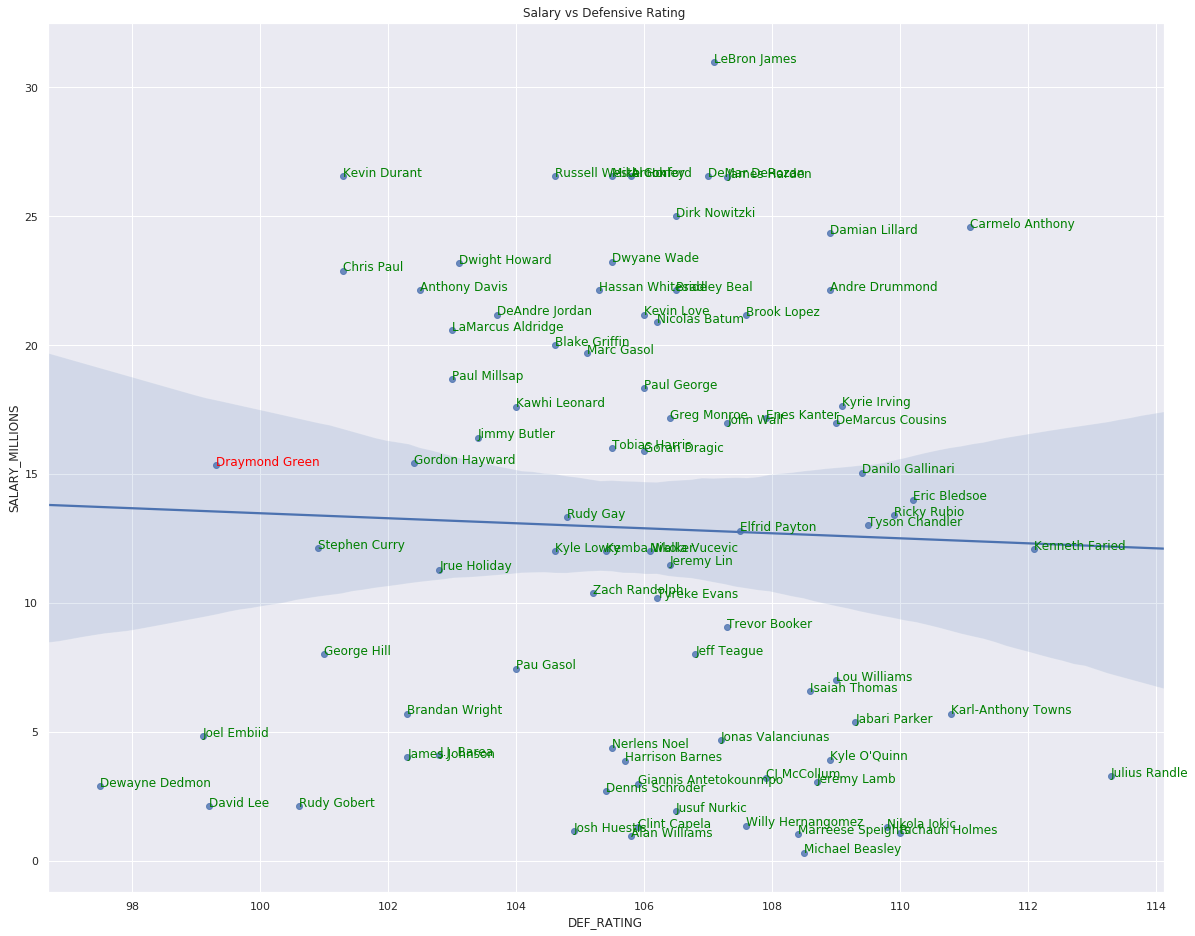

In [17]:
regplot(highest_pts, "DEF_RATING", "SALARY_MILLIONS", "Salary vs Defensive Rating ")

I decided to highlight Draymond Green in this plot. It turns out he was voted All Defensive first team during this season, but it turns out he has a very low defensive rating. This is probably due to the fact that he primarily focuses on defense during games and takes on the other teams' best offensive players, so it is not so surprising that he has lot of points scored on him and thus based on the defensive rating formula, his rating is not so great. One interesting takeaway from this graph is that there is a negative correlation bewteen defensive rating and salary.

## Comparing Salary vs Usage percentage

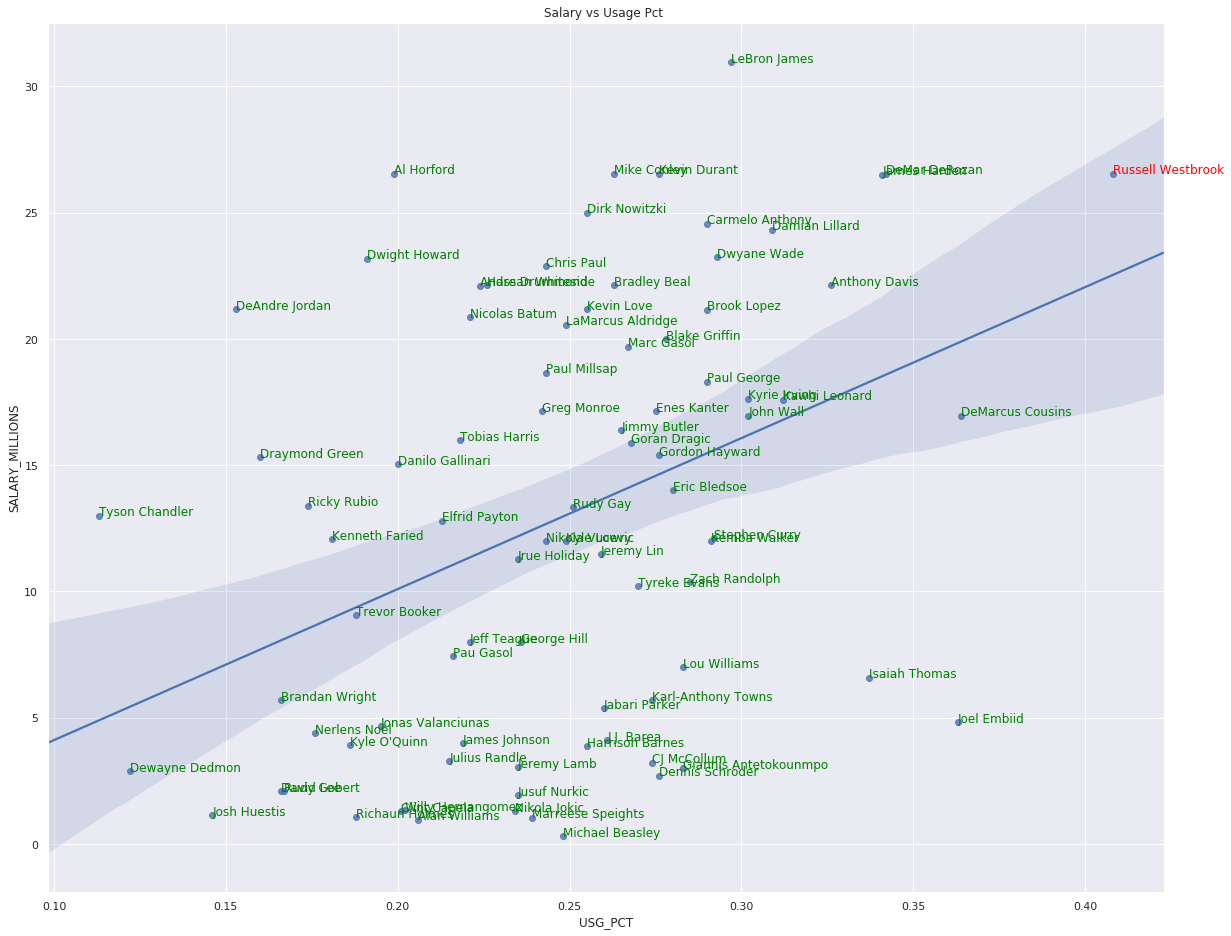

In [18]:
def regplot(df, x, y, title):
    
    fig, ax = plt.subplots()  
    fig = sns.regplot(df[x], df[y], dropna=True)
    plt.title(title)
    
    for i, txt in enumerate(df['PLAYER_NAME']):
        if "Westbrook" in txt: 
            c = "red"
        else:
            c = "green"
        ax.annotate(txt, (df[x][i],df[y][i]), color=c)
    plt.show()

usage = original[['PLAYER_NAME', 'USG_PCT', 'SALARY_MILLIONS', 'PPG']].copy()
regplot(usage, "USG_PCT", "SALARY_MILLIONS", "Salary vs Usage Pct ")

Usage percentage is basically an estimate percentage used by a player while he is in the game. To see how it's calculated, see the link at the top that includes a reference to stat terms. Like PPG and offesnive rating, there again seems to be a positive correlation between usage and salary. We would expect that our highest paid players are being involved the most in team plays which is illustrated in the plot.

## Comparing Salary vs Age

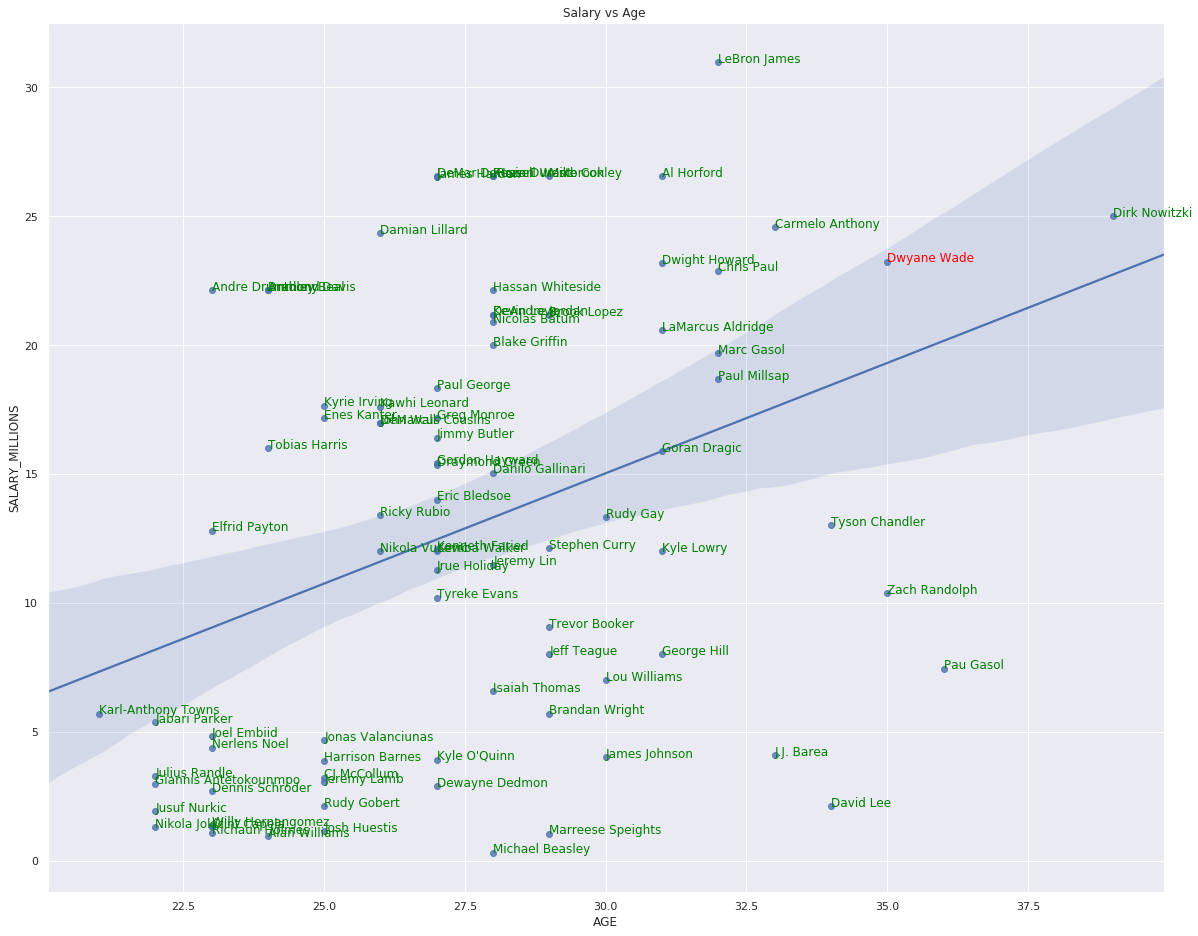

In [19]:
def regplot(df, x, y, title):
    
    fig, ax = plt.subplots()  
    fig = sns.regplot(df[x], df[y], dropna=True)
    plt.title(title)
    
    for i, txt in enumerate(df['PLAYER_NAME']):
        if "Wade" in txt: 
            c = "red"
        else:
            c = "green"
        ax.annotate(txt, (df[x][i],df[y][i]), color=c)
    plt.show()

regplot(highest_pts, "AGE", "SALARY_MILLIONS", "Salary vs Age ")

I decided to highlight Dwyane Wade, my personal favorite player. As we can see, the number of top players begin to dwindle as they get later into their 30's. There is still however, a positive correlation between age and salary. A lot of the veteran players take lower salaries to continue playing later into their career. You can read more about it [here](https://www.quora.com/What-is-the-NBA-veteran-minimum-salary-and-how-does-it-compare-to-the-NFL-and-pro-baseball). 

## Comparing Salary vs All Attributes

Let's see some numbers instead of just plots that illustrate the relationship between salary and the attributes.

In [20]:
df = original[['PLAYER_NAME', 'AGE', 'USG_PCT', 'OFF_RATING', 'DEF_RATING', 
                  'SALARY_MILLIONS', 'PPG']].copy() 
df = df.corr()
df

,AGE,USG_PCT,OFF_RATING,DEF_RATING,SALARY_MILLIONS,PPG
AGE,1.000000,-0.018353,0.054967,-0.259108,0.367636,-0.053616
USG_PCT,-0.018353,1.000000,0.109243,0.090369,0.388076,0.836019
OFF_RATING,0.054967,0.109243,1.000000,-0.127532,0.254593,0.381542
DEF_RATING,-0.259108,0.090369,-0.127532,1.000000,-0.035372,0.040305
SALARY_MILLIONS,0.367636,0.388076,0.254593,-0.035372,1.000000,0.540811
PPG,-0.053616,0.836019,0.381542,0.040305,0.540811,1.000000


## Heatmap of correlations

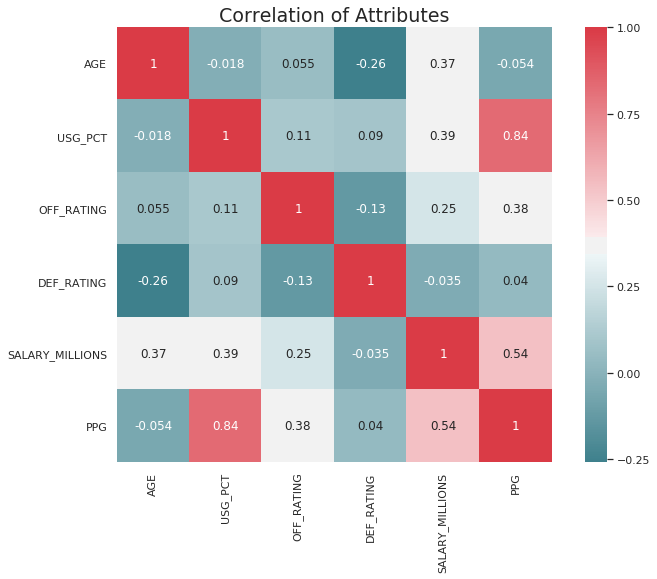

In [21]:
plt.figure(figsize=(12,8))
plt.title("Correlation of Attributes", fontsize=19)
sns.heatmap(df, cmap=sns.diverging_palette(210, 10, as_cmap=True), square=True, annot=True)
plt.show()

There are some interesting takeaways from the heatmap of correaltions. First, as we found from the previous regression plots, all attributes except defensive rating have a positive correaltion with salary. Defensive rating has a pretty negative correaltion with age. I guess all the mileage older players have racked up takes a toll on their defensive abilities. What struck me the most interesting was the age row. Age is pretty much negatively correlated with every attribute except offensive rating, but has a surprisingly high positive corelation with salary. It appears from this information that veterans get paid much better than their younger league members even though they stop producing better results.

## 3. Hypothesis Testing and Machine Learning

We are looking at the impacts of 5 different attributes on overall player salary.  

Null Hypothesis: None of the attributes have a noticeable impact on salary.


To test the null hypothesis, we will perform Multiple Linear Regression on the dataset using scikit-learn.

## Regression with scikit-learn

Before we begin, we have to normalize all the columns since they are all on different scales.

In [22]:
df = original[['AGE', 'USG_PCT', 'OFF_RATING', 'DEF_RATING', 
                  'SALARY_MILLIONS', 'PPG']].copy() 

for column in df: 
    mean = df[column].mean()
    std = df[column].std()
    # normalizing columns
    df['normalized_' + column] = (df[column] - mean)/std
df.head()


,AGE,USG_PCT,OFF_RATING,DEF_RATING,SALARY_MILLIONS,PPG,normalized_AGE,normalized_USG_PCT,normalized_OFF_RATING,normalized_DEF_RATING,normalized_SALARY_MILLIONS,normalized_PPG
0,28,0.408,107.9,104.6,26.54,31.6,0.131791,2.915488,0.003047,-0.418048,1.601935,2.300159
1,24,0.326,104.2,102.5,22.12,28.0,-0.961109,1.431665,-0.868171,-1.095196,1.082926,1.734082
2,27,0.341,113.6,107.3,26.50,29.1,-0.141434,1.703096,1.345195,0.452570,1.597238,1.907050
3,28,0.276,117.2,101.3,26.54,25.1,0.131791,0.526895,2.192867,-1.482137,1.601935,1.278076
4,32,0.297,114.9,107.1,30.96,26.4,1.224690,0.906899,1.651298,0.388079,2.120943,1.482492


Use the dataframe with the grouped attributes (cols) for the regression model. We will create 2 new dataframes for the features and the target of the regression.  
  - The attributes (independent variables) are age, usage, offensive rating, defensive rating and PPG.
  - The target (dependent variable) is the player salary.

In [23]:
cols = ['normalized_AGE','normalized_USG_PCT', 'normalized_OFF_RATING', 'normalized_DEF_RATING', 'normalized_PPG']
atts = df[cols]
target = df[['normalized_SALARY_MILLIONS']]

In [24]:
# Define X and y for use in scikit-learn's LinearRegression() function and fit  the model.
X = atts
y = target['normalized_SALARY_MILLIONS']
lm = linear_model.LinearRegression()
model = lm.fit(X,y)

In [25]:
# Get R^2 value - value of .47 means the variance is not really explained by the model
lm.score(X,y)

0.47401223700709288

 Find the coefficients from the model to see which attributes had the largest impact overall.

In [26]:
coeffs = lm.coef_.tolist()
for attr, coef in zip(cols, coeffs):
    print("Attribute: {}, Coefficient: {}".format(attr,coef))

Attribute: normalized_AGE, Coefficient: 0.4248092146700146
Attribute: normalized_USG_PCT, Coefficient: -0.2911544004128841
Attribute: normalized_OFF_RATING, Coefficient: -0.042029870873874955
Attribute: normalized_DEF_RATING, Coefficient: 0.06257961371456787
Attribute: normalized_PPG, Coefficient: 0.8205117103050485


Findings from the heatmap are actually different with the normalized values. PPG has the most impact on salary. Offensive rating and usage percentage actually have a negative impact on salary (it was defense in the heatmap), which may or may not be small enough to render them insignificant.

To find out which attributes actually have a meaningful impact and to test the null hypothesis we need to observe the p-values. We will use another model for this.

## Regression with statsmodels

This model uses the method of Ordinary Least Squares (OLS) to estimate our parameters.  OLS basically aims to minimize the sum of the squared distances between the actual values in the dataset and the predicted values generated by the regression line.  More information about Ordinary Least Squares can be found [here](https://en.wikipedia.org/wiki/Ordinary_least_squares). We have to add a constant in statsmodels manually we know that our Rating data does not go all the way to zero.

In [27]:
#add a constant to the attributes
smX = sm.add_constant(X)

# use Ordinary Least Squares
OLS_model = sm.OLS(y,X).fit()
OLS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                OLS Regression Results                                
======================================================================================
Dep. Variable:     normalized_SALARY_MILLIONS   R-squared:                       0.474
Model:                                    OLS   Adj. R-squared:                  0.441
Method:                         Least Squares   F-statistic:                     14.42
Date:                        Sat, 15 Dec 2018   Prob (F-statistic):           4.67e-10
Time:                                05:39:18   Log-Likelihood:                -92.802
No. Observations:                          85   AIC:                             195.6
Df Residuals:                              80   BIC:                             207.8
Df Model:                                   5                                         
Covariance Type:                    nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
normalized_AGE            0.4248      0.085      5.022      0.000       0.256       0.593
normalized_USG_PCT       -0.2912      0.163     -1.782      0.078      -0.616       0.034
normalized_OFF_RATING    -0.0420      0.097     -0.431      0.667      -0.236       0.152
normalized_DEF_RATING     0.0626      0.085      0.736      0.464      -0.107       0.232
normalized_PPG            0.8205      0.176      4.667      0.000       0.471       1.170
==============================================================================
Omnibus:                        0.605   Durbin-Watson:                   2.151
Prob(Omnibus):                  0.739   Jarque-Bera (JB):                0.702
Skew:                          -0.027   Prob(JB):                        0.704
Kurtosis:                       2.558   Cond. No.                         4.11
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Looking at the coefficients above it is clear that age and PPG again have the most impact on player salary.

It is important to recognize that the impact from usage_pct, offensive, and defensive ratings arenegligible. From the p-values above ('P>|t|' column in the middle chart) we can see that they all have a value above the critical value of 5% (p-value of 0.05). The remainder of the p-values are well below 0.05, which means they have significance within the model. This means that we reject the null hypothesis because clearly the attributes to contribute to player salary.


I used the following tutorial [here](https://towardsdatascience.com/simple-and-multiple-linear-regression-in-python-c928425168f9) for reference with these two models of Multiple Linear Regression.

# Conclusions


From the heatmap and two multiple linear regression models we discovered that player attributes do indeed affect salary the most. PPG played the largest role in having a higher salary. The top players are usually the one who get fans with their offensive prowess. It would be very hard to find a "bad" player who was able to consistently average a high number of PPG. "Age" is the second-strongest contributor to salary. This is probably not that unexpected because players who have played in the league for a long while are most likely prime players who have tapered off over the years. From the OLS model and p-values, we see that offensive ratings, defensive ratings, and usage percentage do not contribute to the model in a significant way.

I believe if we refined the usage percentage, offensive rating, and defensive rating formulas, they should ultimately play some factor in determining salary. The current formulas ignore too many external factors which may explain why they were deemed insignificant.

